In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns
import gym
import rbf_agent
import dqn_agent
from common import helper as h
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches


/u/51/nguyenb5/unix/Reinforcement-Learning/venv/lib/python3.10/site-packages/glfw/__init__.py:912: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)


In [2]:
env_name = "CartPole-v0"
policy_dir = Path().cwd()/"results"/f'{env_name}'/'model'
env = gym.make(env_name)
num_actions = 2
rbf = rbf_agent.RBFAgent(num_actions)
rbf.load(policy_dir)

/u/51/nguyenb5/unix/Reinforcement-Learning/venv/lib/python3.10/site-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


Text(0.5, 1.0, 'Best policy learned with RBF when x_dot=0 and theta_dot=0')

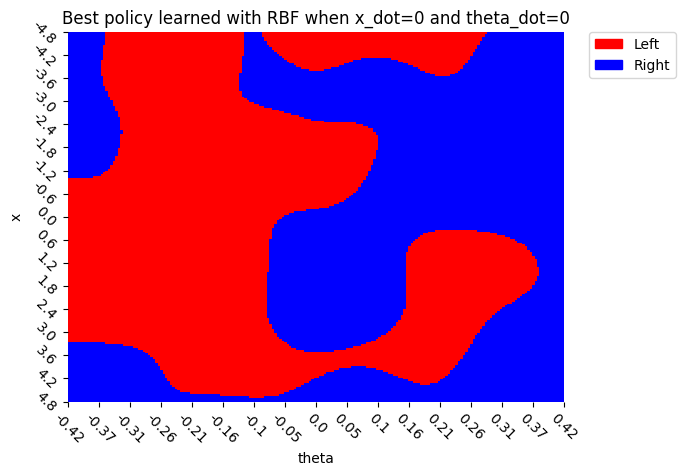

In [11]:
nunber_of_points = 200

th_axis = np.linspace(env.observation_space.low[2], env.observation_space.high[2], num=nunber_of_points)
x_axis = np.linspace(env.observation_space.low[0], env.observation_space.high[0], num=nunber_of_points)

actions = np.array([[rbf.get_action(np.array([x, 0, t, 0])) for t in th_axis] for x in x_axis], dtype=np.int64)

# Plot the colorbar and set the tick labels
# myColors =  ((76/0xFF, 114/0xFF, 176/0xFF, 1), (85/0xFF, 168/0xFF, 104/0xff, 1)) 
# colormap = LinearSegmentedColormap.from_list('Custom', myColors, num_actions)
# s = sns.heatmap(actions, cmap=colormap, cbar_kws=dict(ticks=[0.25, 0.75]))
# cb = s.collections[0].colorbar
# cb.set_ticklabels(['Left', 'Right'])

# Another way but use the legend instead
s = sns.heatmap(actions, cmap=['Red', 'Blue'], cbar=False)
right_patch = mpatches.Patch(color='Red', label='Left')
left_patch = mpatches.Patch(color='Blue', label='Right')
plt.legend(handles=[right_patch, left_patch], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

number_of_ticks = 17

th_ticks = np.linspace(env.observation_space.low[2], env.observation_space.high[2], num=number_of_ticks)
x_ticks = np.linspace(env.observation_space.low[0], env.observation_space.high[0], num=number_of_ticks)

plt.xticks(np.linspace(0, nunber_of_points, number_of_ticks), [round(t, 2) for t in th_ticks], rotation=-45)
plt.yticks(np.linspace(0, nunber_of_points, number_of_ticks), [round(x, 2) for x in x_ticks], rotation=-45)
plt.xlabel('theta') 
plt.ylabel('x')
plt.title("Best policy learned with RBF when x_dot=0 and theta_dot=0")